In [12]:
import numpy as np
import pickle
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms, models
from bs4 import BeautifulSoup
from glob import glob

%matplotlib inline

In [13]:
annotations = glob('./data/annotations/*.xml')

labels = []
bounding_boxes = []
img_paths = []
n_masks = []

for a in annotations:
    with open(a, 'rb') as f:
        content = f.read()

    soup = BeautifulSoup(content, 'xml')

    filename = soup.find('filename').text
    objects = soup.find_all('object')
    n = 0
    for o in objects:
        name = o.find('name').text
        xmin = int(o.find('xmin').text)
        xmax = int(o.find('xmax').text)
        ymin = int(o.find('ymin').text)
        ymax = int(o.find('ymax').text)

        labels.append(name)
        bounding_boxes.append([xmin, ymin, xmax, ymax])

        n = n + 1

    img_paths.append(filename)
    n_masks.append(n)

In [22]:
bounding_boxes[1]

[185, 100, 226, 144]

In [23]:
BASE = './data/images/'
faces = []
j = 0

for i in range(len(img_paths)):
    full_path = BASE + img_paths[i]
    img = cv2.imread(full_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    while(j < len(bounding_boxes)):
        for k in range(n_masks[i]):
            face = img[bounding_boxes[j][1]:bounding_boxes[j][3], bounding_boxes[j][0]:bounding_boxes[j][2]]
            faces.append(face)
        
            j += 1
            
        break

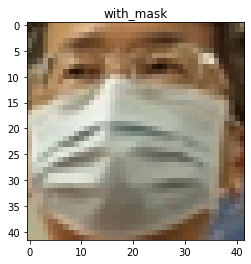

In [26]:
idx = 20

plt.imshow(faces[idx])
plt.title(labels[idx])
plt.show()